<a href="https://colab.research.google.com/github/keirabasma/Formation-IA/blob/main/a_saoudi_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


In [2]:
from google.colab import files

uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)
print(df.head())

Saving homework.csv to homework.csv
   rownames  price  lotsize  bedrooms  bathrms  stories driveway recroom  \
0         1  42000     5850         3        1        2      yes      no   
1         2  38500     4000         2        1        1      yes      no   
2         3  49500     3060         3        1        1      yes      no   
3         4  60500     6650         3        1        2      yes     yes   
4         5  61000     6360         2        1        1      yes      no   

  fullbase gashw airco  garagepl prefarea  
0      yes    no    no         1       no  
1       no    no    no         0       no  
2       no    no    no         0       no  
3       no    no    no         0       no  
4       no    no    no         0       no  


In [3]:
# 1. Load YOUR dataset

df = pd.read_csv("homework.csv")
print("Columns:", df.columns)

# Target = price
y = df["price"].values

# All features except price
X = df.drop(columns=["price"]).values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Columns: Index(['rownames', 'price', 'lotsize', 'bedrooms', 'bathrms', 'stories',
       'driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'garagepl',
       'prefarea'],
      dtype='object')



=== SIMPLE LINEAR REGRESSION (price ~ lotsize) ===
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     219.1
Date:                Sat, 13 Dec 2025   Prob (F-statistic):           6.77e-42
Time:                        21:44:45   Log-Likelihood:                -6247.0
No. Observations:                 546   AIC:                         1.250e+04
Df Residuals:                     544   BIC:                         1.251e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


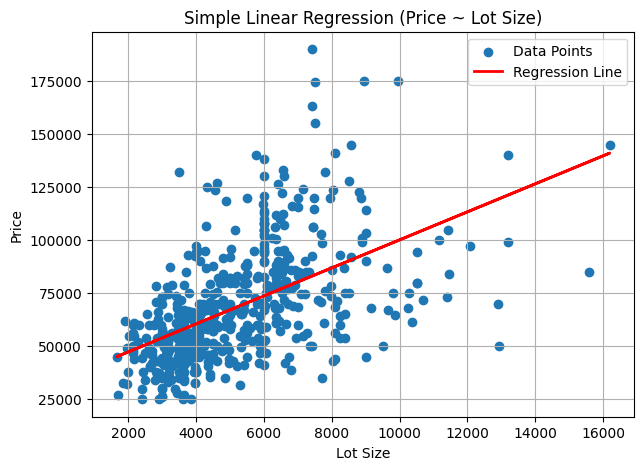

In [4]:
# 2. SIMPLE LINEAR REGRESSION

X_simple = df[["lotsize"]]
Y_simple = df["price"]

# Add constant term
X_simple_const = sm.add_constant(X_simple)

model_simple = sm.OLS(Y_simple, X_simple_const).fit()
print("\n=== SIMPLE LINEAR REGRESSION (price ~ lotsize) ===")
print(model_simple.summary())

# Predictions
y_pred_simple = model_simple.predict(X_simple_const)

# -------- Plot: Simple Regression Curve --------
plt.figure(figsize=(7,5))
plt.scatter(df["lotsize"], df["price"], label="Data Points")
plt.plot(df["lotsize"], y_pred_simple, color="red", linewidth=2, label="Regression Line")
plt.xlabel("Lot Size")
plt.ylabel("Price")
plt.title("Simple Linear Regression (Price ~ Lot Size)")
plt.legend()
plt.grid(True)
plt.show()

Linear Regression
MSE: 256524986.5198622
R²: 0.6160238969106218
Polynomial Regression (degree=3)
MSE: 529102929.6024276
R²: 0.20801913373774483


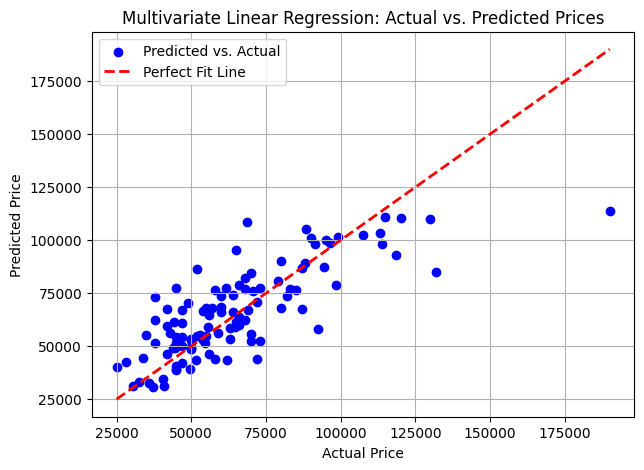

In [12]:
#Multivariate Linear Regression (Real Data)

# --- Start of fix: Preprocessing steps to ensure X and y are numerical ---
df_processed = df.copy()

# Drop 'rownames' column as it's an identifier and not a feature
if 'rownames' in df_processed.columns:
    df_processed = df_processed.drop(columns=['rownames'])

# Identify categorical columns with 'yes'/'no' values
categorical_cols = ['driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'prefarea']

# Convert 'yes'/'no' to 1/0 for these columns
for col in categorical_cols:
    if col in df_processed.columns:
        df_processed[col] = df_processed[col].map({'yes': 1, 'no': 0})

# Target = price
y = df_processed["price"].values

# All features except price
X = df_processed.drop(columns=["price"]).values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# --- End of fix ---

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("Linear Regression")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

#Polynomial Regression
#We apply polynomial transformation on 1 feature for visualization.
# Use only 'lotsize' feature from the preprocessed data for visualization
X_poly = df_processed[['lotsize']].values

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(
    X_poly, y, test_size=0.2, random_state=42
)

# Degree = 3 polynomial
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train_p)
X_test_poly = poly.transform(X_test_p)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train_p)

y_pred_poly = model_poly.predict(X_test_poly)

print("Polynomial Regression (degree=3)")
print("MSE:", mean_squared_error(y_test_p, y_pred_poly))
print("R²:", r2_score(y_test_p, y_pred_poly))
# plot
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, color="blue", label="Predicted vs. Actual")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linestyle='--', linewidth=2, label="Perfect Fit Line")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Multivariate Linear Regression: Actual vs. Predicted Prices")
plt.legend()
plt.grid(True)
plt.show()